## Load the Data and Explore it!!!

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
disney=pd.read_csv("data/disney_plus_titles.csv")
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [3]:
disney.shape

(1368, 12)

In [4]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [5]:
disney.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

## Data Cleaning and Preprocessing

In [6]:
disney.dropna(inplace=True)
disney.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
disney.shape

(788, 12)

In [8]:
### Conerting date column format
disney['date_added'] = pd.to_datetime(disney['date_added'])

In [9]:
disney.date_added.head()

1    2021-09-24
2    2021-09-24
6    2021-09-17
18   2021-09-10
19   2021-09-10
Name: date_added, dtype: datetime64[ns]

## Time Series Analysis

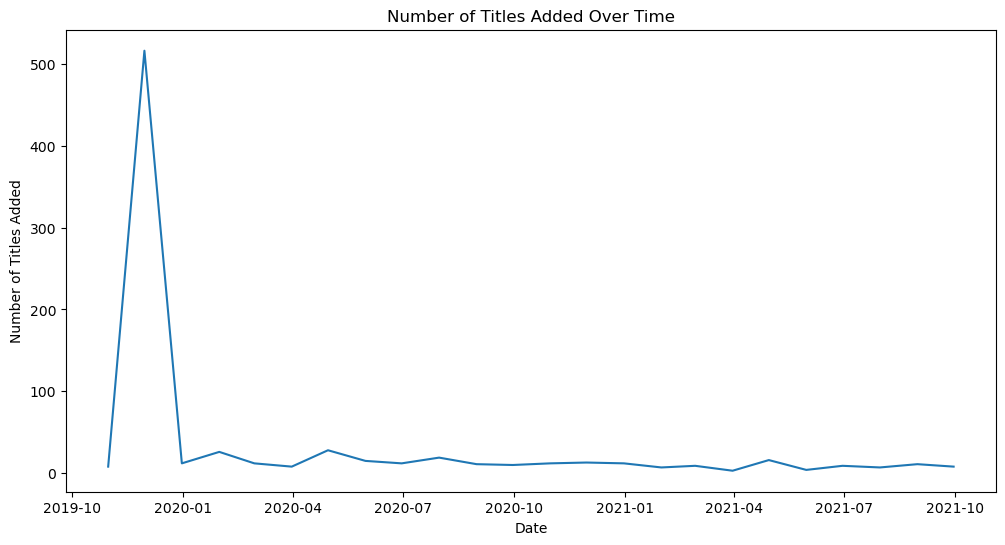

In [10]:
time_series_data = disney.set_index('date_added').resample('ME').size()
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(time_series_data)
ax.set(title='Number of Titles Added Over Time',
       xlabel='Date',
       ylabel='Number of Titles Added')
plt.show()

In [11]:
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
6,s7,Movie,Confessions of a Shopaholic,P.J. Hogan,"Isla Fisher, Hugh Dancy, Joan Cusack, John Goo...",United States,2021-09-17,2009,PG,106 min,"Comedy, Romance, Romantic Comedy",Becky writes a personal finance column en rout...
18,s19,Movie,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...","United States, United Kingdom",2021-09-10,2011,PG-13,140 min,"Action-Adventure, Fantasy",A woman from his past uses Jack to help find t...
19,s20,Movie,Twenty Something,Aphton Corbin,"Kaylin Price, Ariana Brown, Aliyah Taylor, Jan...",United States,2021-09-10,2021,PG,11 min,"Animation, Family","Adulting is hard. One day you're nailing it, t..."


## Sentiment Analysis or Text Mining

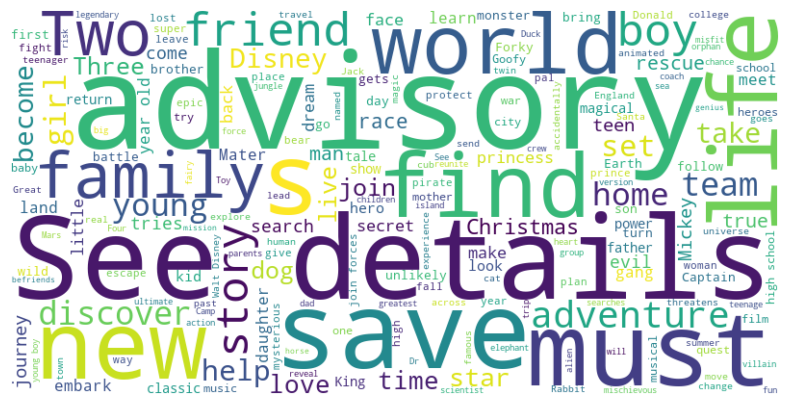

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

descriptions = disney['description']

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(descriptions))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Clustering or Classification

### Preprocess the Text Data

In [13]:
import pandas as pd
import re

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.lower()  
    return text
disney['description_cleaned'] = disney['description'].apply(preprocess_text)

### Extract Features

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


vectorizer = TfidfVectorizer(max_features=5000)
X_description = vectorizer.fit_transform(disney['description_cleaned'])


le_rating = LabelEncoder()
X_rating = le_rating.fit_transform(disney['rating'])

le_listed_in = LabelEncoder()
X_listed_in = le_listed_in.fit_transform(disney['listed_in'])


import scipy.sparse as sp

X_combined = sp.hstack((X_description, 
                        X_rating.reshape(-1, 1), 
                        X_listed_in.reshape(-1, 1)))


le_type = LabelEncoder()
y = le_type.fit_transform(disney['type'])

### Train a Classification Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.25, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluate the model

In [16]:
y_pred = classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=le_type.classes_))

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00       197

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197

